# Exploratory Data Analysis

This data was obtained through the Spotify API, and as a result the dataset is relatively clean, complete, and easily understood. The data was collected by collecting the track features of several manually collected playlists, skipping repeats. The playlists were chosen by searching several (~50) genre names and selecting popular playlists with a high number of tracks, typically 50 or more. Many of the playlists were curated by Spotify. Due to this selection strategy, the dataset is likely to contain several imbalances. Some additional exploration and transformations will be required for the eventual goal of attempting to predict genres, especially when developing a label.

### Load Data

#### Import Libraries

In [1]:
import ast
import os
import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv

sns.set_style('whitegrid')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Define Data location
load_dotenv()

DATA_PATH = Path(os.getenv('PROJECT_ROOT'), '.') / 'data'
TRACKS_FILE = DATA_PATH / 'spotify_track_features.csv'
ARTISTS_FILE = DATA_PATH / 'spotify_artist_features.csv'

In [3]:
# Import data
tracks = pd.read_csv(TRACKS_FILE)
artists = pd.read_csv(ARTISTS_FILE)

#### Inspect data

In [4]:
tracks.head()

,track_id,duration_ms,track_name,track_popularity,artist_ids,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0yM3VmM8gHEVGViKvAbQkc,353920,"Defying Gravity - From ""Wicked"" Original Broad...",56,"['7daPb40K64rRtF36wd3ZOk', '3DgcBA7P0ji5co7Z1G...",0.722,0.333,0.377,0.000000,6,0.0333,-8.282,1,0.0343,87.613,4,0.245
1,5yR9jaIJerOKso2maFPU0w,216133,One Day More,0,['7EzZtsaDuv0EecScnO7wrh'],0.870,0.221,0.477,0.000091,9,0.1730,-7.463,1,0.0316,78.604,4,0.256
2,7FmI3ygVG04KIhikMHKOKB,315013,A Little Priest,46,"['3OsHwkxpSIEqqmYoQxZTT5', '7gX22Ua3mEH2KXTCpI...",0.874,0.537,0.203,0.000000,6,0.0576,-14.700,1,0.0778,105.925,3,0.380
3,3qmB68tGvftnxiomUaNKMW,305373,And I Am Telling You I'm Not Going,0,"['35GL8Cu2GKTcHzKGi75xl5', '0LyfQWJT6nXafLPZqx...",0.206,0.467,0.734,0.000000,10,0.1600,-5.149,1,0.0811,121.351,4,0.345
4,5gw8HNcrqliEw0X6pPrPvG,182746,Seasons of Love,60,"['5gGhRZgP9BJL9fsFdvTzeX', '6jRmwlzMVSICyO97aN...",0.609,0.475,0.579,0.000000,5,0.0756,-4.096,1,0.0334,178.151,4,0.466


In [5]:
tracks.info()
tracks.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11489 entries, 0 to 11488
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          11489 non-null  object 
 1   duration_ms       11489 non-null  int64  
 2   track_name        11488 non-null  object 
 3   track_popularity  11489 non-null  int64  
 4   artist_ids        11489 non-null  object 
 5   acousticness      11489 non-null  float64
 6   danceability      11489 non-null  float64
 7   energy            11489 non-null  float64
 8   instrumentalness  11489 non-null  float64
 9   key               11489 non-null  int64  
 10  liveness          11489 non-null  float64
 11  loudness          11489 non-null  float64
 12  mode              11489 non-null  int64  
 13  speechiness       11489 non-null  float64
 14  tempo             11489 non-null  float64
 15  time_signature    11489 non-null  int64  
 16  valence           11489 non-null  float6

,duration_ms,track_popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,1.148900e+04,11489.000000,11489.000000,11489.000000,11489.000000,11489.000000,11489.000000,11489.000000,11489.000000,11489.000000,11489.000000,11489.000000,11489.000000,11489.000000
mean,2.274040e+05,51.256332,0.378593,0.575451,0.550845,0.228080,5.242754,0.172812,-10.113276,0.613543,0.085662,117.645626,3.879885,0.467521
std,1.085228e+05,24.389092,0.362056,0.192519,0.283026,0.363330,3.550741,0.137975,7.031651,0.486958,0.087259,30.479974,0.449024,0.264251
min,0.000000e+00,0.000000,0.000002,0.000000,0.001100,0.000000,0.000000,0.015700,-47.903000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.703410e+05,39.000000,0.040300,0.449000,0.338000,0.000000,2.000000,0.093900,-12.510000,0.000000,0.036800,94.012000,4.000000,0.242000
50%,2.117910e+05,55.000000,0.238000,0.593000,0.588000,0.000344,5.000000,0.118000,-7.813000,1.000000,0.048700,117.510000,4.000000,0.462000
75%,2.580260e+05,70.000000,0.736000,0.724000,0.785000,0.452000,8.000000,0.203000,-5.346000,1.000000,0.088000,136.956000,4.000000,0.683000
max,2.668693e+06,100.000000,0.996000,0.979000,0.999000,0.994000,11.000000,1.000000,2.015000,1.000000,0.937000,218.803000,5.000000,0.988000


In [6]:
artists.head()

,artist_genres,artist_id,artist_name,artist_popularity,artist_followers
0,['orchestral performance'],1C3E8y3WbXJJYWs9Ex11et,José Serebrier,39,1757
1,['gogeo'],6Oq5iunq4z5E4yAdNpWAjk,Susan Díaz,43,4323
2,"['edm', 'electro house', 'pop dance', 'progres...",6TQj5BFPooTa08A7pk8AQ1,Kaskade,65,922955
3,[],68NgHHqc86eozApgpR8ZTz,Big O,31,976
4,['nueva ola chilena'],4yBGwLykrZ7TsKLIepDxYJ,Carlos Gonzalez,33,1449


In [7]:
artists.info()
artists.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7436 entries, 0 to 7435
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_genres      7436 non-null   object
 1   artist_id          7436 non-null   object
 2   artist_name        7436 non-null   object
 3   artist_popularity  7436 non-null   int64 
 4   artist_followers   7436 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 290.6+ KB


,artist_popularity,artist_followers
count,7436.000000,7.436000e+03
mean,47.555675,1.235776e+06
std,18.324380,5.065056e+06
min,0.000000,0.000000e+00
25%,36.000000,2.859750e+03
50%,49.000000,4.293800e+04
75%,61.000000,5.227248e+05
max,100.000000,1.128150e+08


### Label Exploration

Most of the features that are likely to be useful for predicting genre are already nicely scaled and non-null. The main transformation task will be the development and representation of the genre label. I will work with the subset of artists that have one or more genre labels and the tracks that have at least one such artist associated with them.

In [8]:
# Convert list-like columns explicitly into lists
tracks['artist_ids'] = tracks['artist_ids'].apply(ast.literal_eval)
artists['artist_genres'] = artists['artist_genres'].apply(ast.literal_eval)

In [9]:
# Obtain the number of genres labels per artist
artists['n_genres'] = artists['artist_genres'].apply(len)
artists['n_genres'].describe()

count    7436.000000
mean        2.055944
std         2.063052
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        14.000000
Name: n_genres, dtype: float64

In [10]:
# Since some artists have no genres, obtain subset of artists with non-empty genre list
artists_with_genre = artists[artists['n_genres'] > 0].copy()
artists_with_genre.describe()

,artist_popularity,artist_followers,n_genres
count,5561.000000,5.561000e+03,5561.000000
mean,52.412156,1.646751e+06,2.749146
std,16.101261,5.799405e+06,1.945621
min,0.000000,1.500000e+01,1.000000
25%,42.000000,1.638300e+04,1.000000
50%,54.000000,1.368140e+05,2.000000
75%,64.000000,9.488820e+05,4.000000
max,100.000000,1.128150e+08,14.000000


Note that this filter discards 1875 artists (just over 25% of the initial dataset) and shifts the distributions of popularity and follower count upwards.

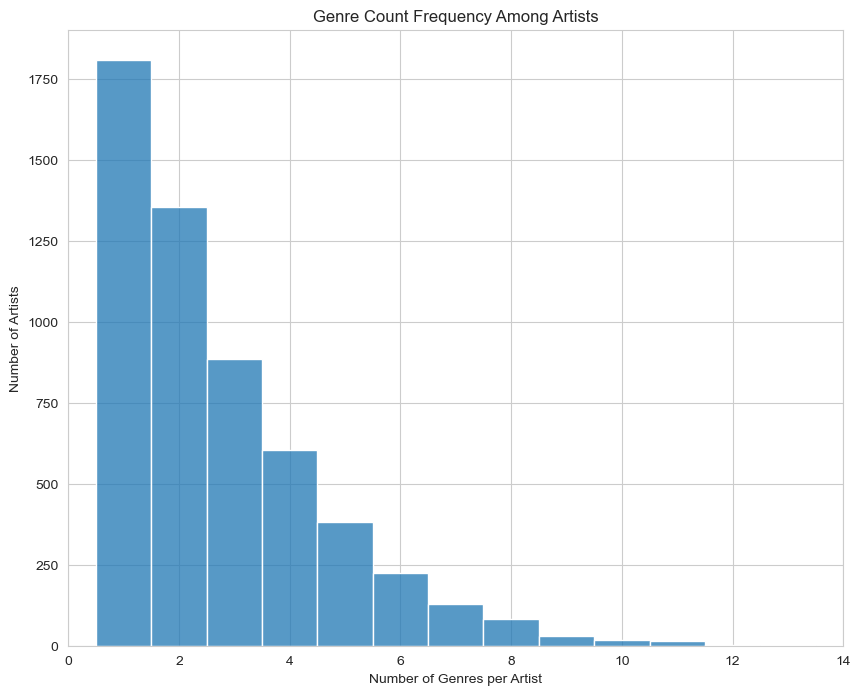

In [11]:
# Plot genres per artist distribution
plt.figure(figsize=(10, 8))
plt.title('Genre Count Frequency Among Artists')
plt.xlim([0,14])
plt.xlabel('Number of Genres per Artist')
plt.ylabel('Number of Artists')
sns.histplot(artists_with_genre['n_genres'], discrete=True)
plt.show()

In [12]:
# Obtain all artist-genre combinations for counting, then count genres, which yields what is essentially the inverse of the above
genre_counts = artists_with_genre.explode('artist_genres')['artist_genres'].value_counts()
genre_counts.head()

artist_genres
rock            198
pop             169
rap             160
classic rock    137
trap            129
Name: count, dtype: int64

In [13]:
n_genres_total = genre_counts.size
print(f'Total genres found: {n_genres_total}')

Total genres found: 1987


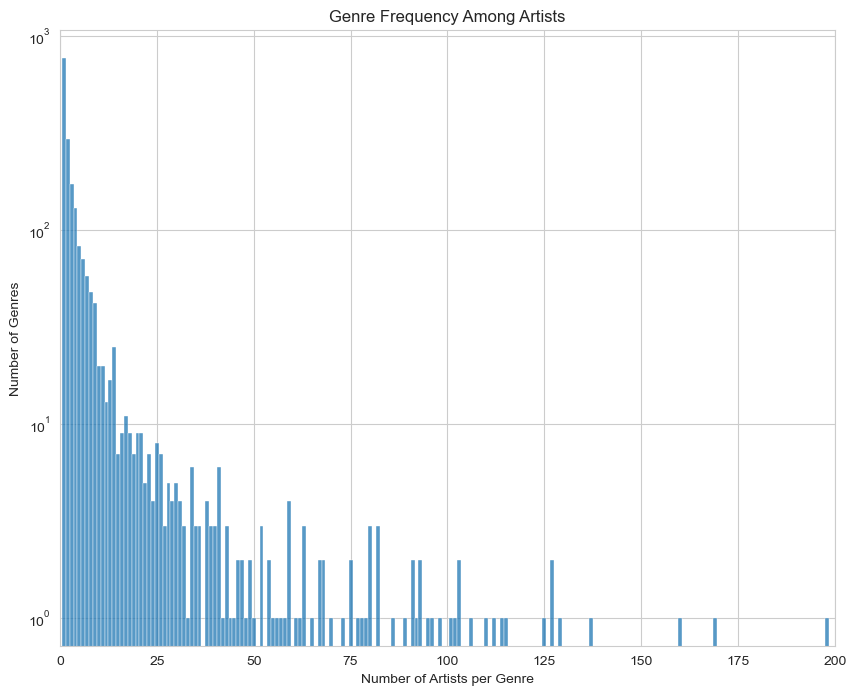

In [14]:
# Plot artists per genre distribution
plt.figure(figsize=(10, 8))
plt.title('Genre Frequency Among Artists')
plt.xlim([0,200])
plt.xlabel('Number of Artists per Genre')
plt.ylabel('Number of Genres')
plt.yscale('log')
sns.histplot(genre_counts, discrete=True)
plt.show()

In [15]:
# Obtain the number of artists per track
tracks['n_artists'] = tracks['artist_ids'].apply(len)
tracks['n_artists'].describe()

count    11489.000000
mean         1.529376
std          0.959319
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         22.000000
Name: n_artists, dtype: float64

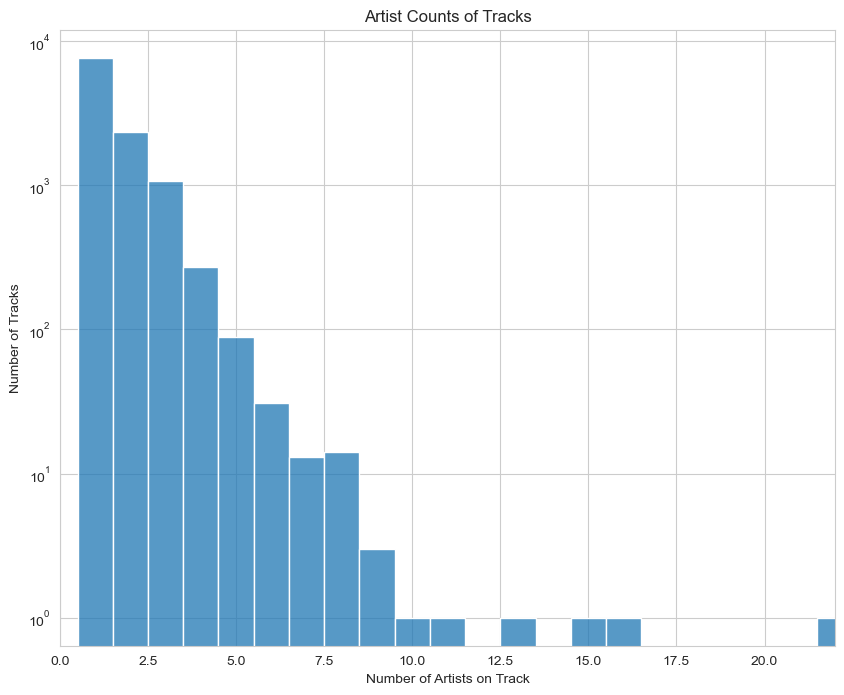

In [16]:
# Plot artists per genre distribution
plt.figure(figsize=(10, 8))
plt.title('Artist Counts of Tracks')
plt.xlim([0,22])
plt.xlabel('Number of Artists on Track')
plt.ylabel('Number of Tracks')
plt.yscale('log')
sns.histplot(tracks['n_artists'], discrete=True)
plt.show()

From the above we learn the following:
- Most genres in the dataset are either extremely specific or obscure, being associated with only one or a few artists
- The artists-per-genre distribution does have a long tail though, so there are a few genres that are associated with a much higher number of artists
- Most artists have a reasonable number of genre tags, with the majority being only associated with one. Even at the extreme tail the number of genre tags is low compared to the number of genres in the dataset.
- Similarly, most tracks are associated with a small number of artists, with the most common number being one.

### Feature Exploration

Although it is possible that metrics such as track popularity, upload dates, and other such data can lend themselves to predicting genres, my interest is to see whether the audio characteristics of tracks can be used for prediction. In most cases, humans are able to categorize music into genres from sound alone, so I would like to experiment with this portion of the data.

Since the track genre labels are coming directly from the artist data, any information about the artists such as artist popularity, follower counts, etc. will result in data leakage and cannot be used for training.

First, filter the tracks such that only tracks that have at least one artist with known genre(s) are in the dataset.

In [17]:
# Obtain track-artist combinations and remove artists without genres, then regroup
track_artist_exp = tracks.explode('artist_ids')
track_artist_exp_filtered = track_artist_exp[track_artist_exp['artist_ids'].isin(artists_with_genre['artist_id'])]
tracks_artists_filtered = track_artist_exp_filtered.groupby('track_id')['artist_ids'].agg(list).reset_index()
tracks_artists_filtered.head()

,track_id,artist_ids
0,000u1dTg7y1XCDXi80hbBX,[5JsdVATHNPE0XdMFMRoSuf]
1,003FTlCpBTM4eSqYSWPv4H,[3vAaWhdBR38Q02ohXqaNHT]
2,003vvx7Niy0yvhvHt4a68B,[0C0XlULifJtAgn6ZNCW2eu]
3,008RKiNmjW5Lb6Ocumq6MA,[6mOCYCpXBAmulHN4kMfQaa]
4,009ImBOrIUlWgla8U05RAC,[6jJ0s89eD6GaHleKKya26X]


In [18]:
# Rejoin the track features and recalculate artist count
tracks_filtered = pd.merge(tracks, tracks_artists_filtered, how='right', on='track_id', suffixes=('', '_filtered'))
tracks_filtered = tracks_filtered.drop(['artist_ids', 'n_artists'], axis=1).rename(columns={'artist_ids_filtered': 'artist_ids'})
tracks_filtered['n_artists'] = tracks_filtered['artist_ids'].apply(len)

In [19]:
tracks_filtered.describe()

,duration_ms,track_popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,n_artists
count,1.041600e+04,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000
mean,2.286264e+05,52.253744,0.360780,0.577236,0.564434,0.205984,5.245776,0.174369,-9.679182,0.612903,0.086908,117.952822,3.886425,0.473638,1.384121
std,1.056449e+05,24.445176,0.353521,0.194247,0.275336,0.349380,3.554538,0.139941,6.641682,0.487109,0.088110,30.271137,0.439159,0.264467,0.787452
min,2.560000e+04,0.000000,0.000002,0.000000,0.001100,0.000000,0.000000,0.015700,-47.903000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.736338e+05,40.000000,0.036650,0.452000,0.364000,0.000000,2.000000,0.093100,-11.953000,0.000000,0.036800,94.195500,4.000000,0.249000,1.000000
50%,2.135395e+05,56.000000,0.216000,0.596000,0.603000,0.000190,5.000000,0.119000,-7.617500,1.000000,0.049000,118.005000,4.000000,0.472000,1.000000
75%,2.584020e+05,71.000000,0.699000,0.726000,0.791000,0.266250,8.000000,0.206000,-5.264750,1.000000,0.091000,137.644500,4.000000,0.688000,2.000000
max,2.668693e+06,100.000000,0.996000,0.979000,0.999000,0.994000,11.000000,1.000000,2.015000,1.000000,0.937000,217.969000,5.000000,0.988000,16.000000


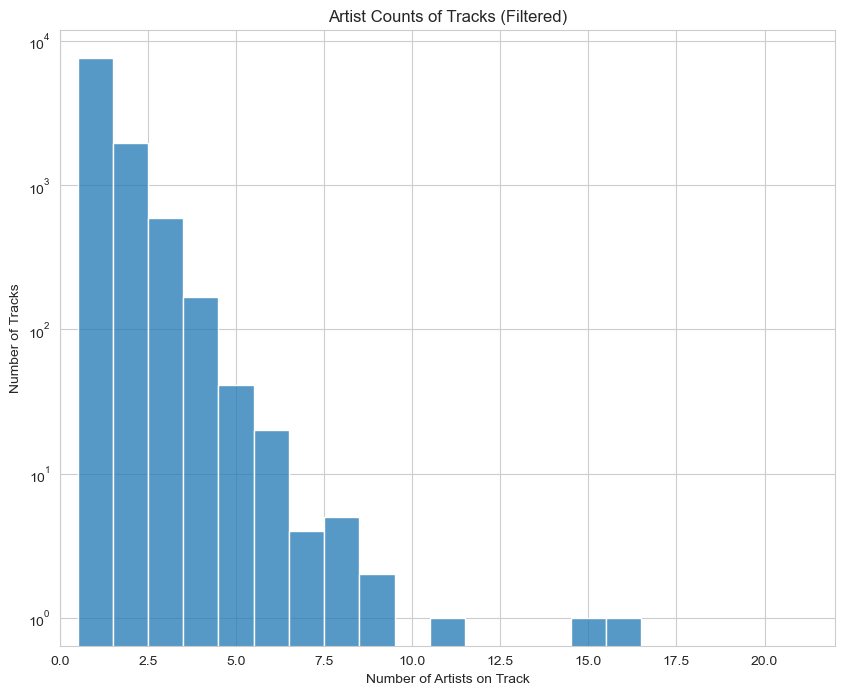

In [20]:
# Plot artists per genre distribution
plt.figure(figsize=(10, 8))
plt.title('Artist Counts of Tracks (Filtered)')
plt.xlim([0,22])
plt.xlabel('Number of Artists on Track')
plt.ylabel('Number of Tracks')
plt.yscale('log')
sns.histplot(tracks_filtered['n_artists'], discrete=True)
plt.show()

After filtering, 1073 tracks are removed from the dataset (about 9.3%), which is lower than anticipated, considering 25% of artists were excluded. The artist count distribution shifts downward and to the left as artists are removed. The distributions of the audio features appear to be similar to before, and the track popularity distribution seems to be relatively stable as well.

There are 12 audio features that will be used to make the prediction. Below, the frequency of each feature is plotted near features that are similar in kind (e.g., tempo and time signature are both related to rhythm). In addition to these features, I will also use the duration of the track to attempt the prediction of musical genre.

In [21]:
# Store the columns used for prediction. Starting with only audio characteristics for the initial attempts
TRACK_FEATURE_FIELDS = [
    'duration_ms', 
    'acousticness', 
    'danceability', 
    'energy', 
    'instrumentalness', 
    'key', 
    'liveness', 
    'loudness', 
    'mode', 
    'speechiness', 
    'tempo', 
    'time_signature', 
    'valence'
]

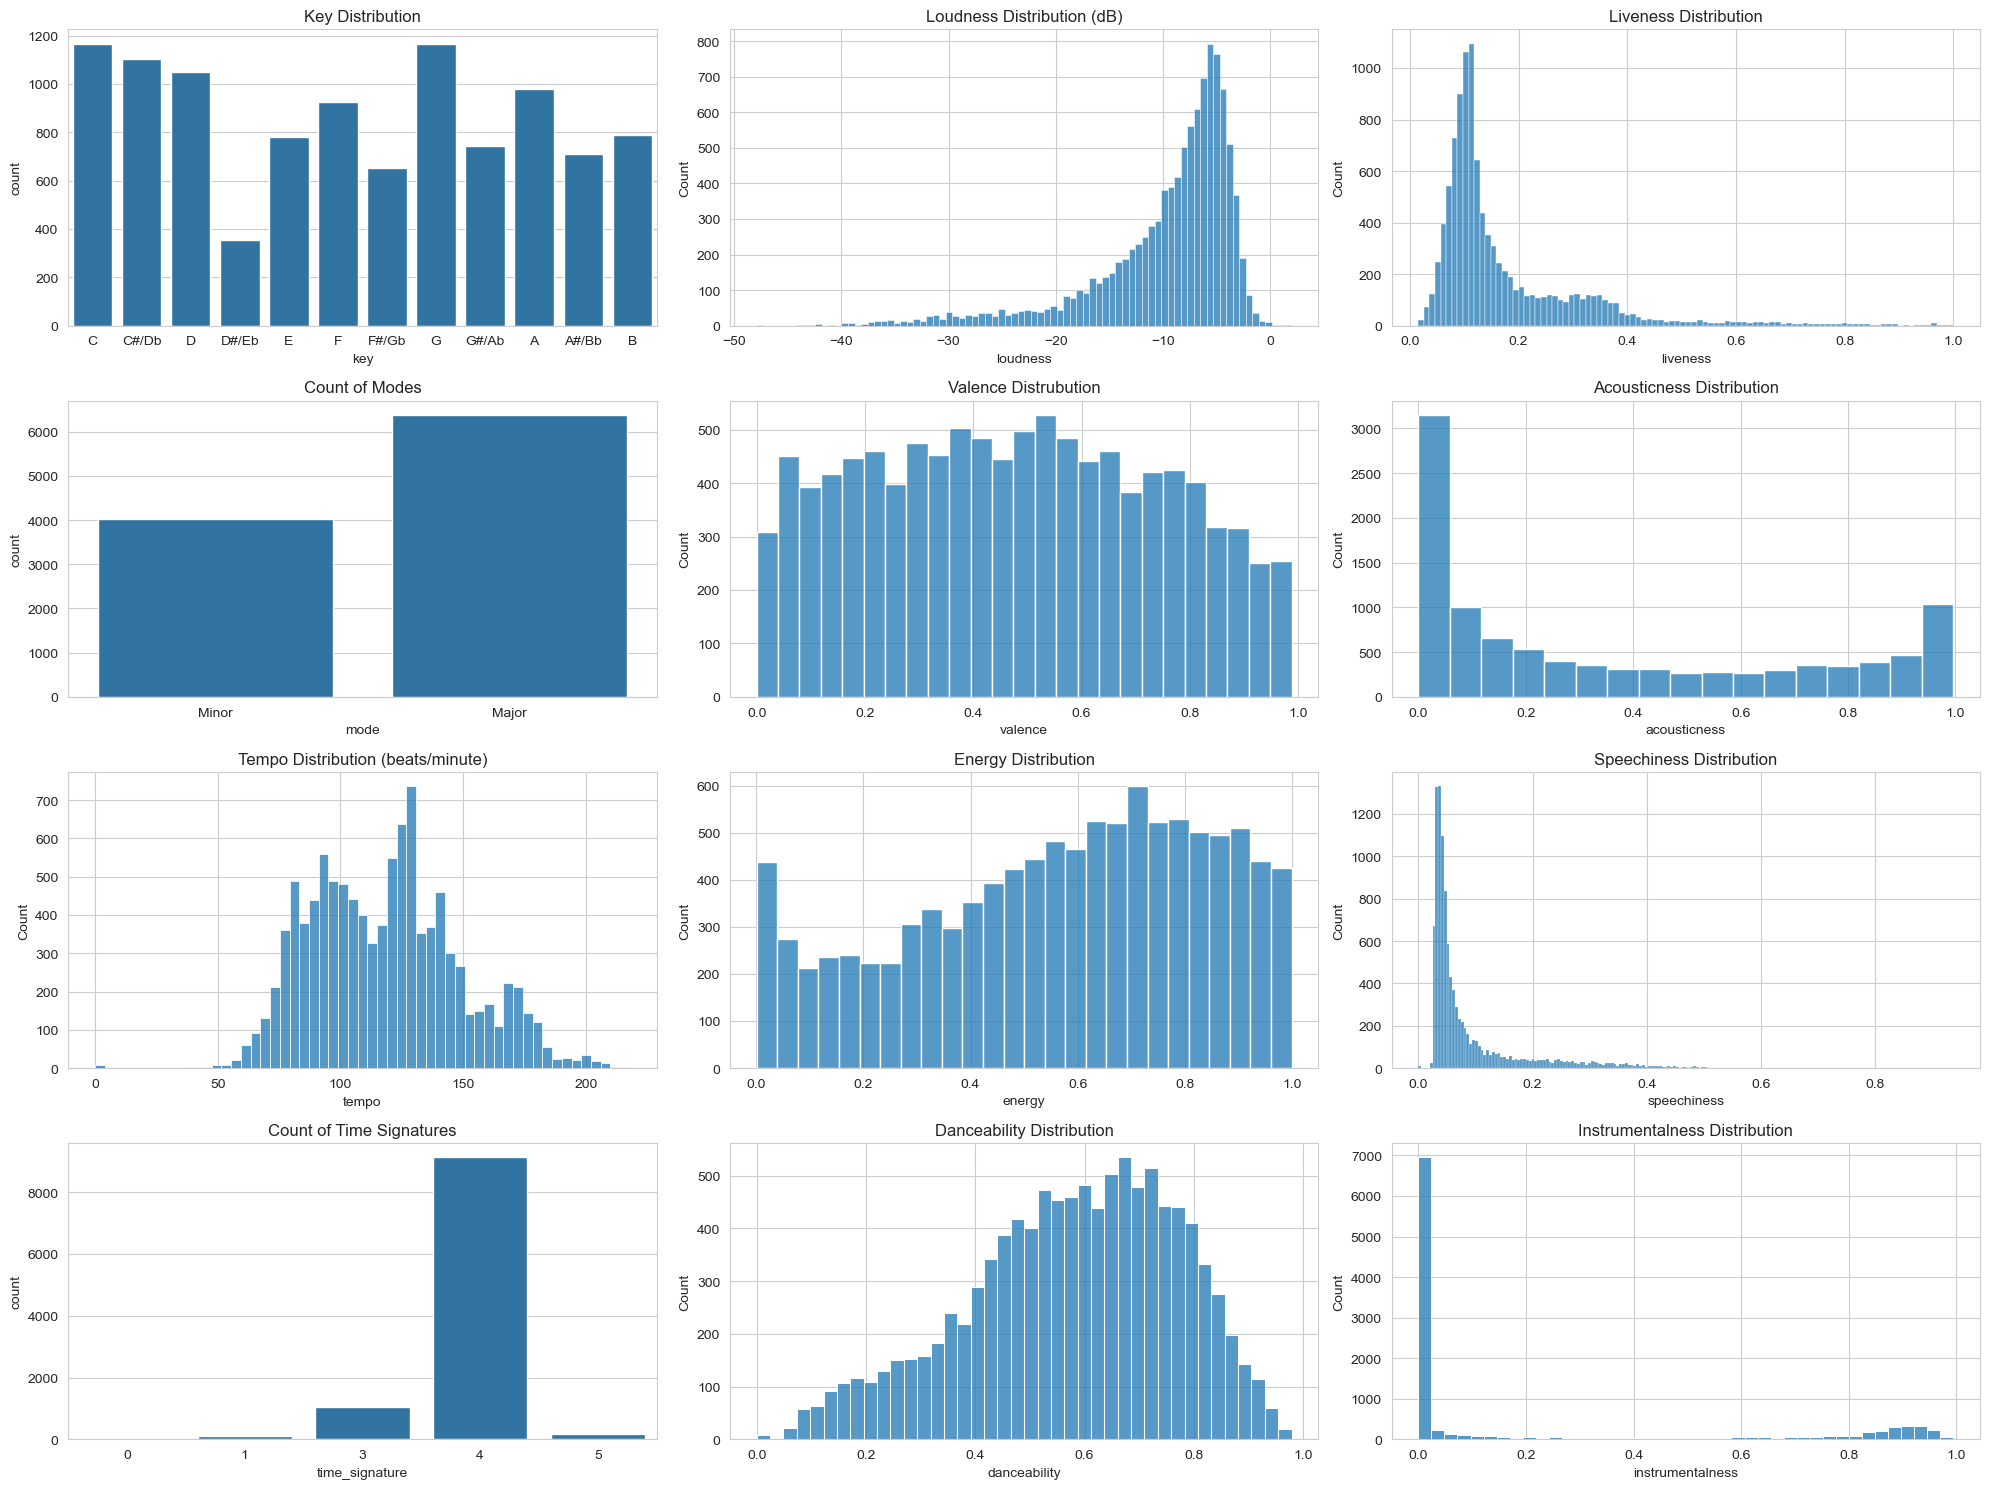

In [22]:
# Plot audio features
plt.figure(figsize=(20, 15))

plt.subplot(4, 3, 1)
plt.title('Key Distribution')
sns.countplot(x=tracks_filtered['key'])
plt.xticks(list(range(12)), ['C', 'C#/Db', 'D', 'D#/Eb','E', 'F', 'F#/Gb', 'G', 'G#/Ab', 'A', 'A#/Bb', 'B'])
plt.subplot(4, 3, 2)
plt.title('Loudness Distribution (dB)')
sns.histplot(tracks_filtered['loudness'])
plt.subplot(4, 3, 3)
plt.title('Liveness Distribution')
sns.histplot(tracks_filtered['liveness'])

plt.subplot(4, 3, 4)
plt.title('Count of Modes')
sns.countplot(x=tracks_filtered['mode'])
plt.xticks([0, 1], ['Minor', 'Major'])
plt.subplot(4, 3, 5)
plt.title('Valence Distrubution')
sns.histplot(tracks_filtered['valence'])
plt.subplot(4, 3, 6)
plt.title('Acousticness Distribution')
sns.histplot(tracks_filtered['acousticness'])

plt.subplot(4, 3, 7)
plt.title('Tempo Distribution (beats/minute)')
sns.histplot(tracks_filtered['tempo'])
plt.subplot(4, 3, 8)
plt.title('Energy Distribution')
sns.histplot(tracks_filtered['energy'])
plt.subplot(4, 3, 9)
plt.title('Speechiness Distribution')
sns.histplot(tracks_filtered['speechiness'])

plt.subplot(4, 3, 10)
plt.title('Count of Time Signatures')
sns.countplot(x=tracks_filtered['time_signature'])
plt.subplot(4, 3, 11)
plt.title('Danceability Distribution')
sns.histplot(tracks_filtered['danceability'])
plt.subplot(4, 3, 12)
plt.title('Instrumentalness Distribution')
sns.histplot(tracks_filtered['instrumentalness'])

plt.tight_layout()
plt.show()

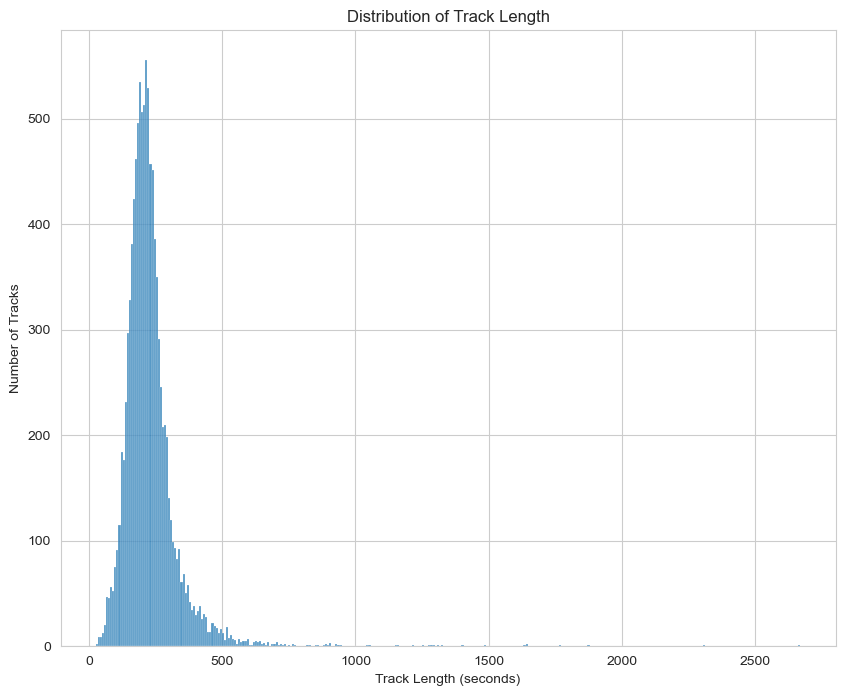

In [23]:
# Plot track length distribution
plt.figure(figsize=(10, 8))
plt.title('Distribution of Track Length')
plt.xlabel('Track Length (seconds)')
plt.ylabel('Number of Tracks')
sns.histplot(tracks_filtered['duration_ms'] / 1000)
plt.show()

It is important to keep in mind that the musical characteristics reported are the outputs of Spotify's internal audio analysis software, which makes predictions on the raw audio data. The audio feature values in the dataset could come from different models, versions of models, and be associated with different confidence levels or even incomplete analysis and errors.

However, the outputs of the Spotify analyzer are used to power Spotify's own recommendation systems, which are generally considered to be reliable. Furthermore, even erroneous model outputs can be used for predicting genre, especially if the source of the error is predictable and indicative of some underlying musical characteristic.

Some observations from the data:
- The values of key and mode are inter-related. This could be a potential feature cross during modeling. Furthermore, there are keys that are not captured by these features, especially in non-Western music.
- The distribution is skewed towards louder tracks. This is expected because many of the playlists ingested were skewed towards newer music, and newer music is generally louder.
- Liveness is skewed low, which is also expected since most tracks are not recordings of live performances.
- Acousticness and tempo appear to be multi-modal, especially the latter near multiples of 30bpm, which are common musical tempos.
- Very few tracks have high values of speechiness, which is expected as a value near the maximum would be indicative of a podcast or audiobook rather than music
- The counts of time signature contain some visible errors. 0/4 and 1/4 time signatures are not meaningful, and upon manual checking many of the tracks listed as 5/4 are 4/4 instead.
- The distribution of track length seems to be relatively normal, with a long, thin tail representing a small number of long tracks

#### Bivariate Analysis

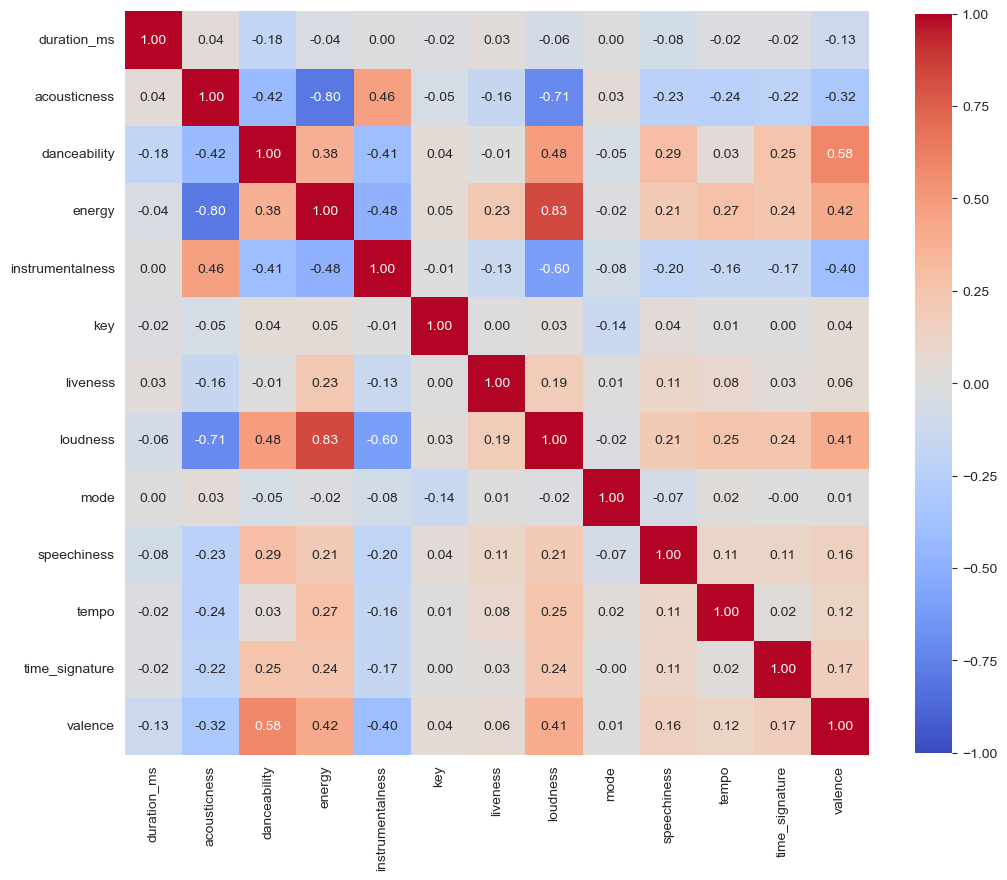

In [24]:
# Calculate and display correlations between features
corr = tracks_filtered[TRACK_FEATURE_FIELDS].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True, cbar_kws={"shrink": 0.8}, fmt=".2f")
plt.show()

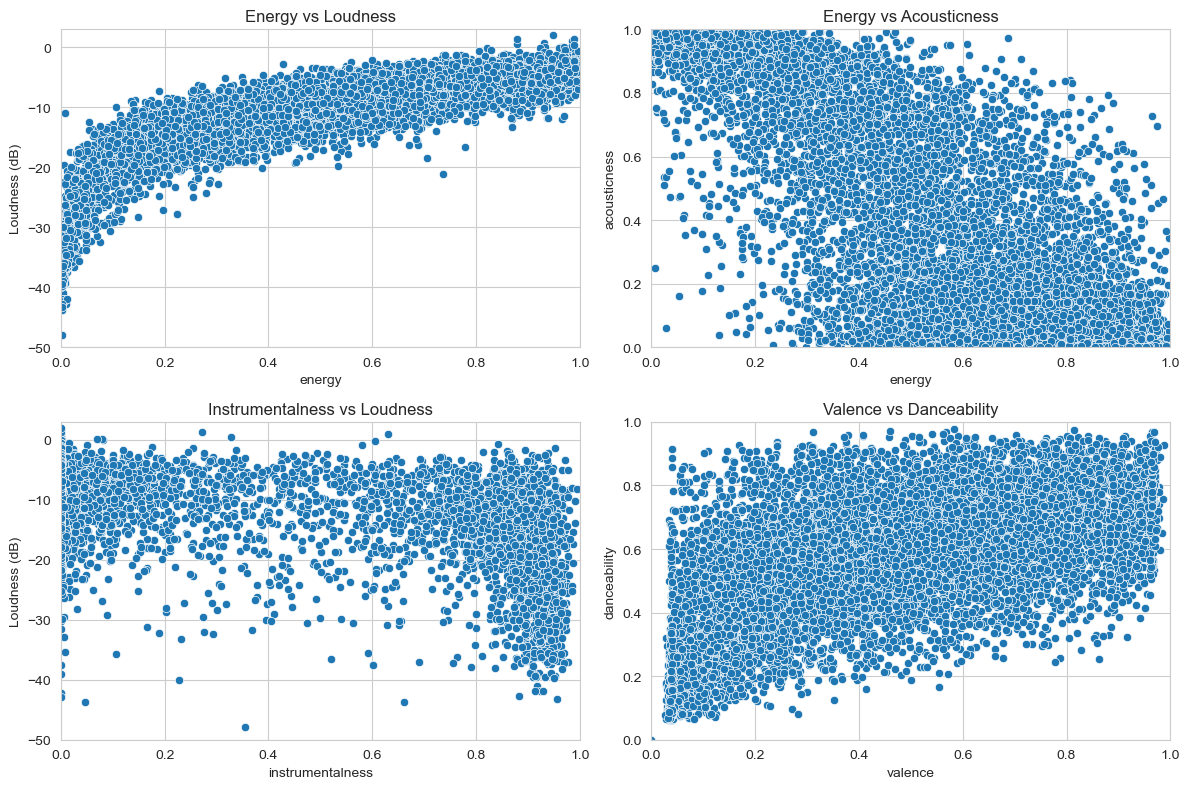

In [25]:
# Directly inspect a few of the stronger correlations
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(x=tracks_filtered['energy'], y=tracks_filtered['loudness'])
plt.title('Energy vs Loudness')
plt.ylabel('Loudness (dB)')
plt.xlim([0, 1])
plt.ylim([-50, 3])

plt.subplot(2, 2, 2)
sns.scatterplot(x=tracks_filtered['energy'], y=tracks_filtered['acousticness'])
plt.title('Energy vs Acousticness')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.subplot(2, 2, 3)
sns.scatterplot(x=tracks_filtered['instrumentalness'], y=tracks_filtered['loudness'])
plt.title('Instrumentalness vs Loudness')
plt.ylabel('Loudness (dB)')
plt.xlim([0, 1])
plt.ylim([-50, 3])

plt.subplot(2, 2, 4)
sns.scatterplot(x=tracks_filtered['valence'], y=tracks_filtered['danceability'])
plt.title('Valence vs Danceability')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.tight_layout()
plt.show()

It is apparent that the features are correlated, strongly in some cases. The clearest example is between loudness and energy. According to the Spotify Web API reference, the more subjective higher-order features such as energy, danceability, etc. are actually based off of the more fundamental features such as loudness and tempo, so a high degree of correlation is expected in many cases.

It is also worth noting that duration, key, and mode are not strongly correlated to other features, which is not too surprising except maybe in the case of mode and valence. The negative correlation between speechiness and instrumentalness is also a bit weaker than I expected, considering these seem opposed. However, the relative scaling may be an issue, since speechiness values above `0.66` are meant to represent content that is entirely spoken word such as audiobooks and podcasts. Similarly, instrumentalness values of `0.5` or higher are meant to represent tracks with no spoken word, with values closer to `1` indicating higher confidence.

### Initial transforms for label representation

I will treat this as a multi-label classification problem, because a single track can belong to multiple genres, especially in this case, where the genres are highly specific. A potential extension or improvement would be to first cluster the genres, which might simplify the problem into a multi-class classification task (in which a track belongs to only one genre class). Such a model may still struggle with a few tracks that simultaneously contain elements of multiple disparate genres. 

Another possibility is to develop a genre hierarchy, and treat the problem as a series of sequential binary classification problems, first predicting class membership in generic genres (such as `edm`) and using those predictions as features in predicting membership in more specific genre classes (such as `brazilian tech house`). However, this introduces the need for higher model complexity and more advanced modeling techniques, especially when considering the possibility of a complicated genre relationship graph that might not be tree-like. Such a graph may even contain cycles.

For the first attempt at classification, I will attempt to use a multi-hot powerset representation, i.e., each genre is treated as a distinct label and is marked as `1` if present and `0`  otherwise. This is the simplest representation, and it directly maps to the structure of the data. The performance of the model will be likely need to be benchmarked to the prediction of well-represented labels, for which there is more training data. For more obscure genres and genre combinations, it is likely that there will not be enough training data for prediction. It is also possible that the model will not even perform well on the broader genre categories, in which case clustering is the more straightforward approach for improvement.

In [26]:
# Perform another join with the filtered tracks and artists to get artist genres at a per-track level
tracks_filtered_artist_exp = tracks_filtered.explode('artist_ids')
tracks_artist_exp_merge = pd.merge(
    tracks_filtered_artist_exp, 
    artists_with_genre[['artist_id', 'artist_genres', 'n_genres']],
    left_on='artist_ids', 
    right_on='artist_id'
)
tracks_genres_agg = tracks_artist_exp_merge.groupby('track_id').agg({
    'artist_genres': lambda x: list(set().union(*x)),
    'n_genres': 'sum'
})
tracks_with_genre = pd.merge(tracks_filtered, tracks_genres_agg, on='track_id')

The above cell creates a list of genre names for each track. This can later be converted into the multi-hot encoding discussed previously. Another possible extension would be to use weighted encoding, or soft encoding. For example, if a track has two artists and each artist is associated with two genres, one of which is the same, then the overlapping genre could be encoded as a `2` and the others as a `1`. 

This representation results in a label that describes not only class membership, but the strength of class membership, blurring the lines between classification and regression because the degree of membership can be thought of as continuous. It is unlikely that the dataset size is large enough train a model capable of predicting all possible genres of a track, so this extension is better-suited to projects at a larger scale, such as the entire Spotify catalog.

In [27]:
# Obtain descriptive stats for number of genres
tracks_with_genre['n_genres'].describe()

count    10416.000000
mean         4.404570
std          3.528924
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         91.000000
Name: n_genres, dtype: float64

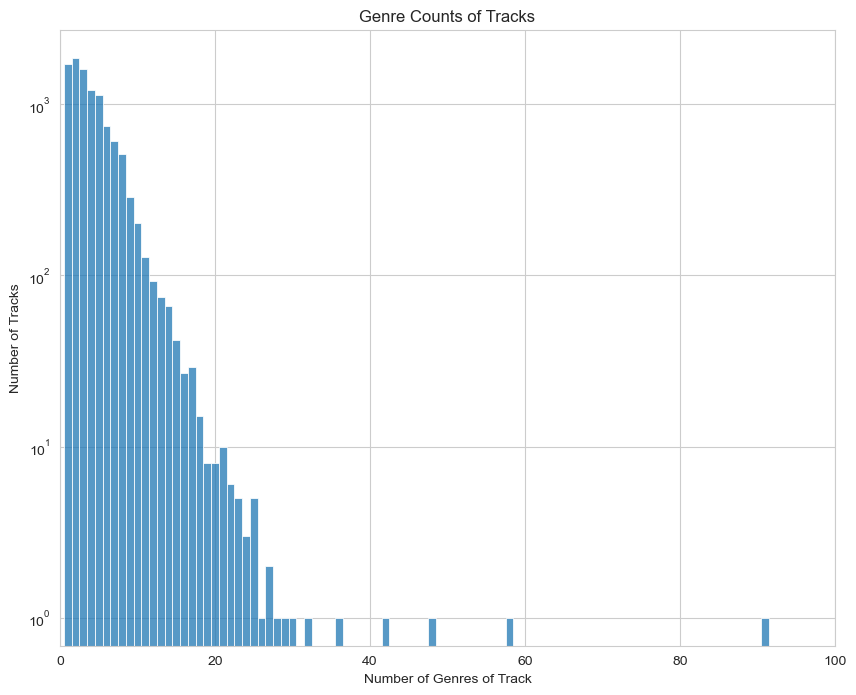

In [28]:
# Plot genres per track distribution
plt.figure(figsize=(10, 8))
plt.title('Genre Counts of Tracks')
plt.xlim([0,100])
plt.xlabel('Number of Genres of Track')
plt.ylabel('Number of Tracks')
plt.yscale('log')
sns.histplot(tracks_with_genre['n_genres'], discrete=True)
plt.show()

Most tracks are associated with more than one genre, with the median being four. A higher count of genres will increase the required model complexity and the corresponding volume of training data needed for such a model. This is why it will likely be necessary to simplify the label with clustering, or to account for this in the evaluation criteria.

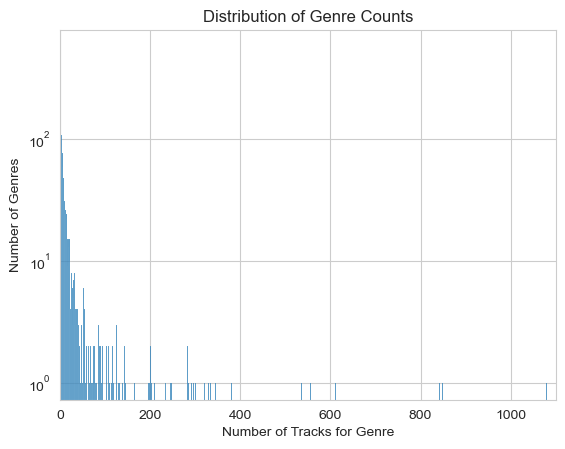

Number of genres that appear in only one track: 565


In [35]:
track_genre_counts = tracks_with_genre.explode('artist_genres')['artist_genres'].value_counts()

plt.title('Distribution of Genre Counts')
plt.xlabel('Number of Tracks for Genre')
plt.ylabel('Number of Genres')
plt.yscale("log")
plt.xlim([0, 1100])
sns.histplot(track_genre_counts, discrete=True)
plt.show()

print(f'Number of genres that appear in only one track: {sum(track_genre_counts==1)}')

As seen previously with the artist data, most genres are "rare," only appearing in a single track or a few number of tracks. However, there are also genres that appear in hundreds of tracks as well.

In [30]:
print(f'Number of genres that appear in only one track: {sum(track_genre_counts<=9)}')

Number of genres that appear in only one track: 1396


In [31]:
tracks_with_genre.info()
tracks_with_genre.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10416 entries, 0 to 10415
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          10416 non-null  object 
 1   duration_ms       10416 non-null  int64  
 2   track_name        10416 non-null  object 
 3   track_popularity  10416 non-null  int64  
 4   acousticness      10416 non-null  float64
 5   danceability      10416 non-null  float64
 6   energy            10416 non-null  float64
 7   instrumentalness  10416 non-null  float64
 8   key               10416 non-null  int64  
 9   liveness          10416 non-null  float64
 10  loudness          10416 non-null  float64
 11  mode              10416 non-null  int64  
 12  speechiness       10416 non-null  float64
 13  tempo             10416 non-null  float64
 14  time_signature    10416 non-null  int64  
 15  valence           10416 non-null  float64
 16  artist_ids        10416 non-null  object

,duration_ms,track_popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,n_artists,n_genres
count,1.041600e+04,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000
mean,2.286264e+05,52.253744,0.360780,0.577236,0.564434,0.205984,5.245776,0.174369,-9.679182,0.612903,0.086908,117.952822,3.886425,0.473638,1.384121,4.404570
std,1.056449e+05,24.445176,0.353521,0.194247,0.275336,0.349380,3.554538,0.139941,6.641682,0.487109,0.088110,30.271137,0.439159,0.264467,0.787452,3.528924
min,2.560000e+04,0.000000,0.000002,0.000000,0.001100,0.000000,0.000000,0.015700,-47.903000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.736338e+05,40.000000,0.036650,0.452000,0.364000,0.000000,2.000000,0.093100,-11.953000,0.000000,0.036800,94.195500,4.000000,0.249000,1.000000,2.000000
50%,2.135395e+05,56.000000,0.216000,0.596000,0.603000,0.000190,5.000000,0.119000,-7.617500,1.000000,0.049000,118.005000,4.000000,0.472000,1.000000,4.000000
75%,2.584020e+05,71.000000,0.699000,0.726000,0.791000,0.266250,8.000000,0.206000,-5.264750,1.000000,0.091000,137.644500,4.000000,0.688000,2.000000,6.000000
max,2.668693e+06,100.000000,0.996000,0.979000,0.999000,0.994000,11.000000,1.000000,2.015000,1.000000,0.937000,217.969000,5.000000,0.988000,16.000000,91.000000


In [32]:
tracks_with_genre.head()

,track_id,duration_ms,track_name,track_popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist_ids,n_artists,artist_genres,n_genres
0,000u1dTg7y1XCDXi80hbBX,300600,I Don't Want A Lover,1,0.196000,0.756,0.470,0.000487,7,0.1260,-12.615,1,0.0394,120.484,4,0.4300,[5JsdVATHNPE0XdMFMRoSuf],1,"[new romantic, scottish rock, new wave pop]",3
1,003FTlCpBTM4eSqYSWPv4H,233266,"Swing, Swing",70,0.000065,0.553,0.717,0.128000,7,0.0385,-5.857,1,0.0318,127.947,4,0.3180,[3vAaWhdBR38Q02ohXqaNHT],1,"[neo mellow, pop punk, neon pop punk, pop rock...",7
2,003vvx7Niy0yvhvHt4a68B,222973,Mr. Brightside,90,0.001210,0.352,0.911,0.000000,1,0.0995,-5.230,1,0.0747,148.033,4,0.2360,[0C0XlULifJtAgn6ZNCW2eu],1,"[dance rock, alternative rock, permanent wave,...",5
3,008RKiNmjW5Lb6Ocumq6MA,298666,TWO OF US,46,0.927000,0.144,0.188,0.684000,4,0.1520,-13.680,0,0.0399,85.762,4,0.0743,[6mOCYCpXBAmulHN4kMfQaa],1,[anime score],1
4,009ImBOrIUlWgla8U05RAC,228878,Unconditionally,82,0.002730,0.432,0.725,0.000000,7,0.2080,-4.862,1,0.0431,128.902,4,0.3530,[6jJ0s89eD6GaHleKKya26X],1,[pop],1


#### Conclusions and Data Export

While this dataset is relatively clean and well-structured, it presents modeling challenges due to the highly specific, overlapping, and imbalanced nature of the genre labels.

The findings from the exploration of audio features will guide the feature engineering efforts and inform the choice of modeling strategies. 

The initial strategy will be to frame the problem as multi-label classification with a label powerset and leave the features relatively unchanged. Due to the rarity of most genres, the modeling will have to account for this. The simplest way will be to exclude the very uncommon genres. This modeling will most likely under-perform but can serve as a baseline for future attempts involving clustering or sub-setting the data. 

In [33]:
# # Export data for feature engineering
# EXPORT_FILE_NAME = 'spotify_track_genres_preprocessed.csv'
# 
# export_path = DATA_PATH / EXPORT_FILE_NAME
# tracks_with_genre.to_csv(export_path, index=False)